# Singular Value Decomposition

Singular value decomposition takes a rectangular matrix of gene expression data (defined as A, where A is a n x p matrix) in which the n rows represents the genes, and the p columns represents the experimental conditions. The SVD theorem states:

![svd_formulae](./images/svd_formulae.png)


Where the columns of U are the left singular vectors (gene coefficient vectors); S (the same dimensions as A) has singular values and is diagonal (mode amplitudes); and V^T has rows that are the right singular vectors (expression level vectors). The SVD represents an expansion of the original data in a coordinate system where the covariance matrix is diagonal.



In [1]:
import numpy as np
from scipy.linalg import svd,eig

#### finding SVD values with easy way and assemble

In [2]:
arr = np.array([
    [1,2,6,8],
    [3,4,7,9]
])

U,S,VT = svd(arr)

In [3]:
print(arr)

[[1 2 6 8]
 [3 4 7 9]]


In [4]:
print(U)

[[-0.63398891 -0.77334214]
 [-0.77334214  0.63398891]]


In [5]:
print(S)

[16.04604275  1.58887135]


In [6]:
print(VT)

[[-0.18409619 -0.27180199 -0.57443001 -0.74984161]
 [ 0.710331    0.6226252  -0.12721641 -0.30262801]
 [-0.42976161  0.36898254  0.64033436 -0.5187762 ]
 [-0.52615912  0.63428182 -0.49377936  0.27753396]]


In [7]:

print(U.shape,S.shape,VT.shape)

(2, 2) (2,) (4, 4)


#### Assemble matrix

In [8]:
singular_value_dim = (U.shape[1],VT.shape[0])
singular_value = np.zeros(singular_value_dim)
print(singular_value)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
for row in range(singular_value_dim[0]):
    for col in range(singular_value_dim[1]):
        if row < S.shape[0]:
            if row == col:
                singular_value[row][col] = S[row]

In [10]:
print(S)

[16.04604275  1.58887135]


In [11]:
print(singular_value)

[[16.04604275  0.          0.          0.        ]
 [ 0.          1.58887135  0.          0.        ]]


In [12]:
print(U.shape,singular_value.shape,VT.shape)

(2, 2) (2, 4) (4, 4)


In [13]:
U @ singular_value @ VT

array([[1., 2., 6., 8.],
       [3., 4., 7., 9.]])

#### Calculating with eigen values and vectors

- for U
    - calculate A * AT
    - calculate eigen values and vectors
    - U = eigen vectors of A * AT
- for V
    - calculate AT * A
    - calculate eigen values and vectors
    - V = eigen vectors of AT * A

In [14]:
aaT = arr @ arr.T
aTa = arr.T @ arr

In [15]:
U_values, U = eig(aaT)

eigen vector for U

In [16]:
print(U)

[[-0.77334214 -0.63398891]
 [ 0.63398891 -0.77334214]]


eigen value of U

In [17]:
print(U_values)

[  2.52451216+0.j 257.47548784+0.j]


In [18]:
V_values, V = eig(aTa)

eigen vector of V

In [19]:
print(V.T)

[[-0.18409619 -0.27180199 -0.57443001 -0.74984161]
 [ 0.710331    0.6226252  -0.12721641 -0.30262801]
 [ 0.64780737 -0.6562097  -0.26508738  0.28189204]
 [-0.00734194 -0.10763191  0.80848791 -0.57854021]]


eigen values of V

In [20]:
print(V_values)

[ 2.57475488e+02+0.j  2.52451216e+00+0.j -6.70099921e-16+0.j
  8.89903972e-15+0.j]


- singular value : square root of U values in descending order

In [21]:
singular_val = np.sqrt(U_values.real)
np.sort(singular_val)[::-1]

array([16.04604275,  1.58887135])

###  Image processing with SVD

In [156]:
import matplotlib.pyplot as plt

In [157]:
colored_arr = plt.imread("./images/rdj.jpg")

In [163]:
colored_arr[:,:,0].shape

(550, 550)

In [210]:
colored_arr[...,:3].shape

(550, 550, 3)

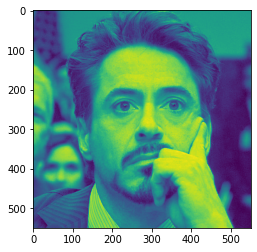

In [185]:
plt.imshow(colored_arr[:,:,0])

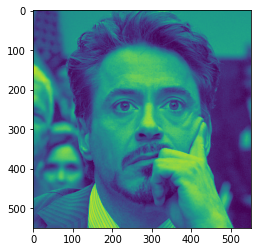

In [187]:
plt.imshow(colored_arr[:,:,1])

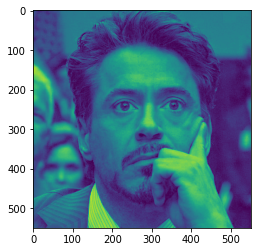

In [188]:
plt.imshow(colored_arr[:,:,2])

In [217]:
u,s,vT = svd(colored_arr[:,:,0])

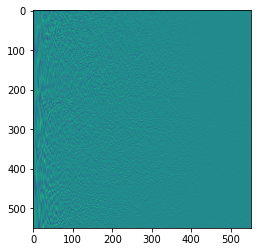

In [221]:
plt.imshow(u)

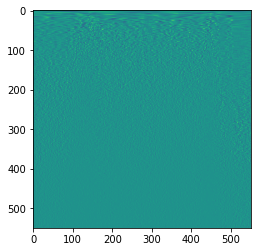

In [223]:
plt.imshow(vT)

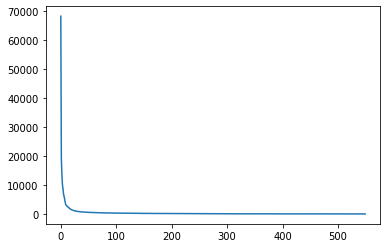

In [224]:
plt.plot(s)

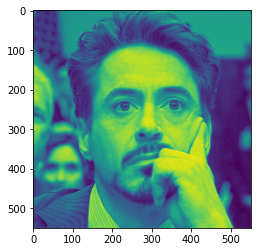

In [225]:
sv_dim = (u.shape[1],vT.shape[0])
sv = np.zeros(sv_dim)

for row in range(sv_dim[0]):
    for col in range(sv_dim[1]):
        if row < s.shape[0]:
            if row == col:
                sv[row][col] = s[row]
                

plt.imshow(u @ sv @ vT)